# Praelexis technical assessment

- build a simple model of the data using the pymc package
- data source: https://www.kaggle.com/crowdflower/twitter-airline-sentiment

In [17]:
# Import libraries

import pymc as mp
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

# Exploring data

In [18]:
# Read in data

df = pd.read_csv('.\data\Tweets.csv')

df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [19]:
print(df.dtypes, df.shape) # check data types and dimension of data

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object (14640, 15)


In [20]:
# Create separate dataframes for each sentiment

positive_df = df[df['airline_sentiment'] == 'positive']
neutral_df = df[df['airline_sentiment'] == 'neutral']
negative_df = df[df['airline_sentiment'] == 'negative']

In [26]:
# Define a function to create a word cloud for text data categorised by sentiment

def wordcloud(data, variable, title):
    # Create an array from the image chosen as a mask
    # image source: https://suncatcherstudio.com/image-editor/
    usa_mask = np.array(Image.open(r'.\usa.jpg'))

    # Combine all the tweets into a single string for the specific dummy variable
    all_tweets = ' '.join(data[variable].astype(str))

    # Define stopwords and generate the word cloud
    stopwords = set(STOPWORDS)       # common words to exclude
    wordcloud = WordCloud(width=800, height=800,
                          background_color= "white",
                          stopwords=stopwords,
                          mask=usa_mask,
                          contour_color="#90EE90",
                          contour_width=1,
                          min_font_size=10).generate(all_tweets)

    # Plot the WordCloud image
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(f"Word cloud for {title}", fontsize=15)
    plt.show()


Call function

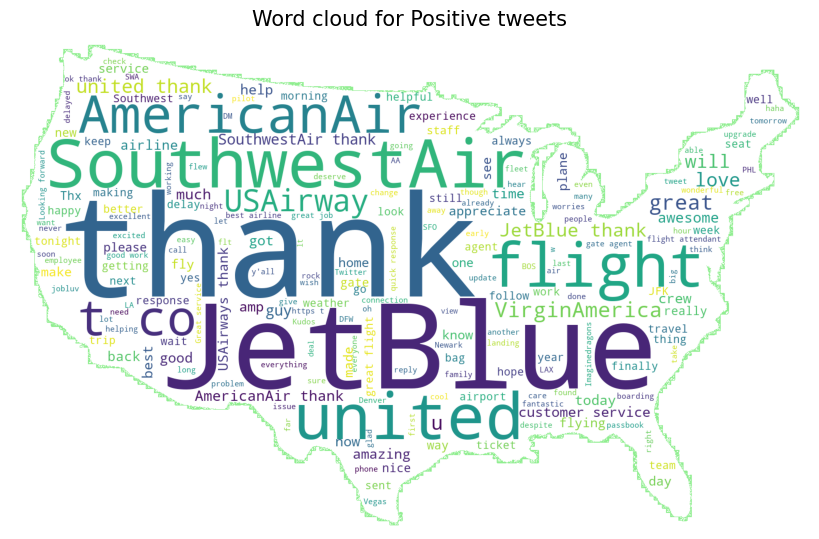

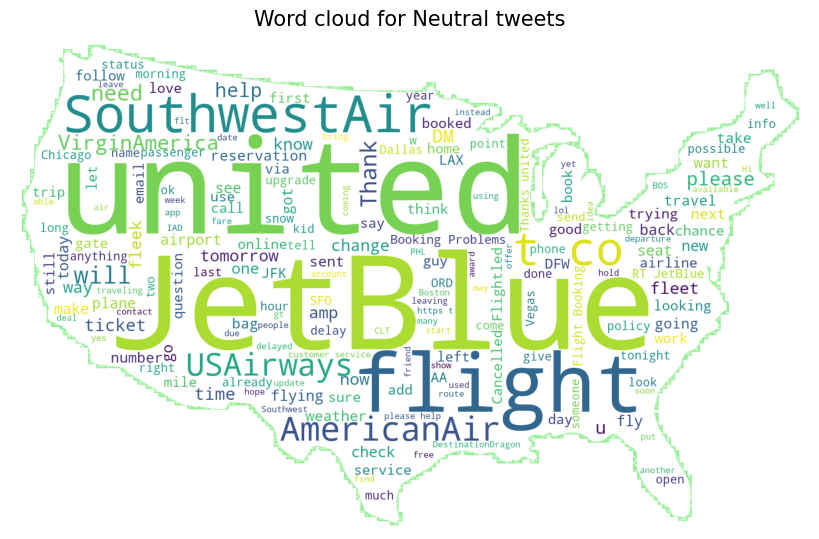

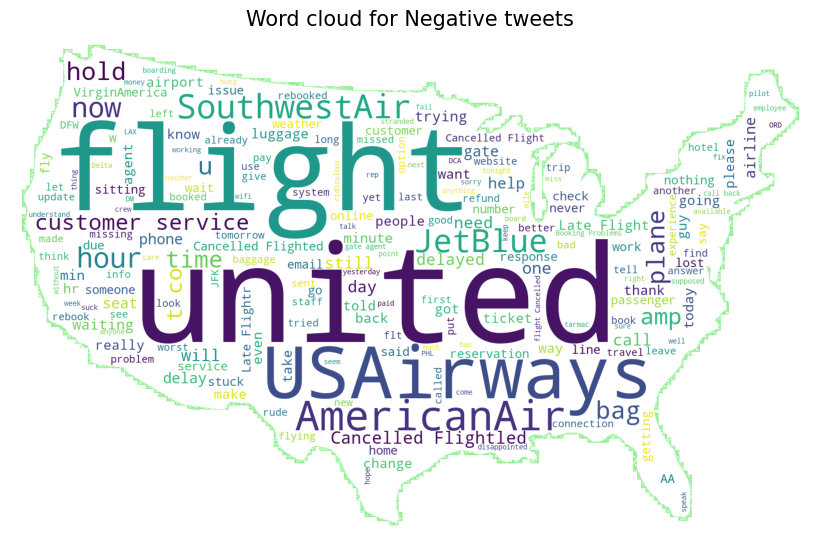

In [28]:
# Wordcloud for tweets
wordcloud(positive_df, 'text', 'Positive tweets')
wordcloud(neutral_df,  'text', 'Neutral tweets')
wordcloud(negative_df, 'text', 'Negative tweets')

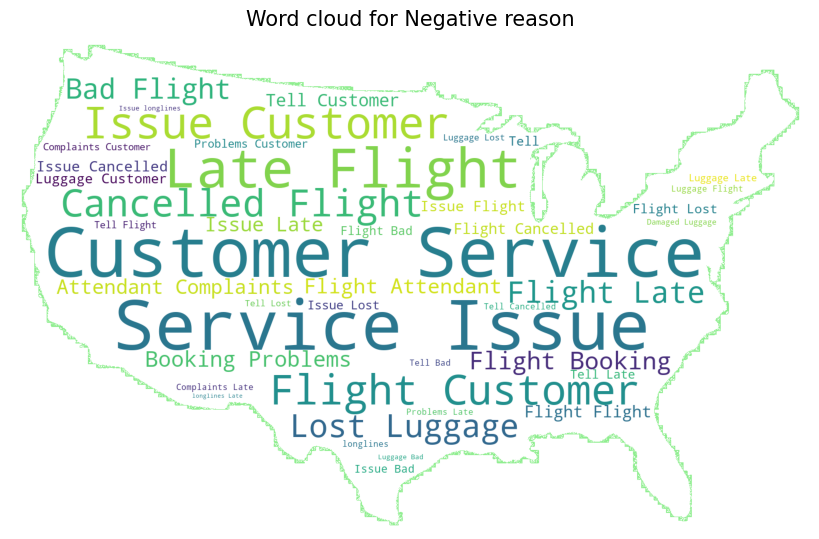

In [27]:
# Wordcloud for negative reason
wordcloud(negative_df, 'negativereason', 'Negative reason')